In [1]:
!pip install bnlp_toolkit
!pip install wordcloud
!wget -q https://www.omicronlab.com/download/fonts/kalpurush.ttf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 56.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=41580b14aa106bfe16049bd5e2185acdb55d79d12dbf64872d45c3b5d2e288b6
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.10
    Uninstalling wcwidth-0.2.10:
      Successfully uninstalled wcwidth-0.2.10


# SA dataset preparation

In [1]:
import pandas as pd
import re

In [2]:
df_train1 = pd.read_csv('train.csv')
df_train1

,Data,Sentiment
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন ।,2
1,এটা কেন হচ্ছে ? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে...,2
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,2
3,চুরি নয় লুটপাট ।,2
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,0
...,...,...
14847,সনি হত্যর বিচার করেনি বিএনপি ২০০২ সালে,1
14848,আদনান ভাই তো আগেই বলে দিয়েছে যে দাম বেশি হবে,1
14849,প্রথম নয় ২য় বাংঙ্গালী হিসেবে,0
14850,হিল্লোল ভাই আপনার বাসায় খেতে যাচ্ছি,0


In [3]:
df_test1 = pd.read_csv('test.csv')
df_test1

,Data,Sentiment
0,অস্ট্রেলিয়ার এই টিম নতুন হিসেবে ভালোই করছে । ত...,1
1,হুম পারত যদি আপনার মত একজন ভাল মাপের ব্যাটসম্য...,1
2,প্রথম আলোর এই ডিপারমেন্ট খুব কাঁচা রিপোটের দিক...,2
3,"আমি আগেও বলছি , এই অস্টলিয়া কে নিয়ে আমি তেমন আ...",0
4,আপনি কি অস্ট্রেলিয়ার খেলা আসলেই দেখেন নাকি শু...,2
...,...,...
2995,ভালভাবে নির্বাচন দেন ।,0
2996,বঙ্গবন্ধুর খুনীদের পারবেন না ? এই মূহূর্তে অবশ...,0
2997,আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক ।,0
2998,দেশের প্রশাসন নিরপেক্ষ না । এমতাবস্থায় তারেক জ...,0


In [4]:
df2 = pd.read_excel('bangla_news_comments_12000.xlsx')
label = []
for i,row in df2.iterrows():
  tag = row['Tag'].lower().replace('  ',' ').strip()
  if tag == 'negative' or tag == 'very negative':
    label.append(0)
  elif tag == 'positive' or tag == 'very positive':
    label.append(1)
  elif tag == 'neutral':
    label.append(2)

df2['Sentiment'] = label
df2.rename(columns = {'Comment':'Data'}, inplace = True)
df2 = df2.drop(['Tag'], axis=1)
df2

,Data,Sentiment
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,0
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,0
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,0
3,চুরি নয় লুটপাট।,0
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,2
...,...,...
13797,ভালভাবে নির্বাচন দেন।,2
13798,বঙ্গবন্ধুর খুনীদের পারবেন না? এই মূহূর্তে অবশ্...,2
13799,আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক।,2
13800,দেশের প্রশাসন নিরপেক্ষ না। এমতাবস্থায় তারেক জি...,2


In [5]:
from sklearn.model_selection import train_test_split
df_train2 ,df_test2 = train_test_split(df2, test_size=0.20, random_state=101)
df_train2

,Data,Sentiment
304,দারুণ ব্যাপার তো! আগে মিনিট প্রতি সর্বনিম্ন অফ...,0
3624,একেকটি আবিষ্কার আমাদের কাছে একেকটি মহা আশ্চর্য...,1
1623,পৃথিবীর সকল স্বাধীন দেশে ই আয়কর দেওয়া লাগে। আম...,0
13406,হায়রে পুলিশ,0
6601,সর্ব জায়গায় নেটওয়ার্ক শুবিধা নেই।,0
...,...,...
5695,"৩/৬/৯/১২ মাস, এত কম জেল হলে অসাধু ব্যবসায়ীরা ভ...",2
8006,আমাদের প্রতিহিংসা এত নিম্ন স্ত্ররে নেমেছে যে ব...,0
1361,শুরুটাই হলো অপরিকল্পিত ভাবে। সব কিছু ঠিকঠাক না...,1
1547,এই বিধান প্রতিযোগীতা কে ধ্বংস করে সিন্ডিকেট বা...,2


In [6]:
df_test2

,Data,Sentiment
9439,বার্সা ৬ গোল খায় নাই কপালগুণে,0
1408,এমনিতেই বিএইচবিএফসি কর্মকর্তাদের সাথে কথাই বলা...,0
8589,দেশের প্রায় ৬০ শতাংশ কারখানাই শেয়ারড ও কনভার্ট...,0
2443,এই আমাদের শিক্ষা ব্যবস্থা,0
5005,কিছু করার নাই দেশে গনততন্ত্র প্রতিষ্ঠা করতে হবে,1
...,...,...
5866,এশা তার বক্তব্যে নিজেই তো অন্যায় করেছে বলে স্ব...,2
6941,"মি. অনিচ্ছুক, আপনার কথায় মনে হচ্ছে টেলিটকে মান...",0
10906,একজন মাদ্রিদ ফ্যান হিসাবে আমি খুব খুশী। কারন এ...,0
1984,"কৃষককে প্রতিবছর জমি বেচে বেচে ভাত খেতে হচ্ছে, ...",0


In [7]:
df_train = pd.concat([df_train1,df_train2], axis=0)
df_train = df_train.sample(frac = 1)
df_train

,Data,Sentiment
1307,"দেশে যে পরিমাণ ধুলাবালি , তারচেয়েও বেশি গরীর ...",2
5444,"হাসিনা ও আপনার মত ওয়াদা করেছল ৯৬', বিরধি দল এ ...",0
9792,একদম সঠিক বিকল্প সিলেট সিক্সার্স কে অভিনন্দন।,1
1394,ভ্যাট কারা দিবে? যারা কোটি কোটি ডলার নিয়ে যাচ্...,0
8918,এখন আর সেই যুগ নাই অনেক দিক থেকেই অনেক ফোন এগি...,1
...,...,...
4152,সোহেল ভাই আপনি ঠিকই ধরেছেন বাংগালীর রোগ । জোর ...,2
13257,মুসলিম তার নয়নমনি হিন্দু তাহার প্রাণ,0
11962,বেকারদেরই তো চাকরি দিতে হয়। কিন্তু ঘরে ঘরে চাক...,1
13755,পুরো একটা পর্ব ইংরেজিতে করতে পারবেন,0


In [8]:
df_test = pd.concat([df_test1,df_test2], axis=0)
df_test = df_test.sample(frac = 1)
df_test

,Data,Sentiment
3791,জঙ্গলে আগুন লাগলে ছোট বড় গাছ হিসাব করে পুড়ে না।,2
107,এ আর নতুন কি বরং সৌম্য দীর্ঘসময় ব্যাটিং করাটাই...,1
2758,৪ বছর পর যখন বিশ্বকাপে আর্জেন্টিনা আর্জেন্টিনা...,0
13071,মাশরাফির সম্মানে অন্যান্য প্রার্থীদেরও উচিৎ নি...,1
11106,সেলুকাস ভালো উত্তর দিতে পারতো,2
...,...,...
10467,নিজে আগে ভালভাবে তথ্যটি জানুন তারপর অন্যকে বলু...,0
4331,বিজিবি নায়েক আবদুর রাজ্জাককে অপহরণের সময় বিজিব...,0
9995,সাকিবকে নিয়ে এইসব যে লেখা হল তার কোনও প্রমাণ আ...,2
4228,আপনার এত বিজ্ঞ আইনজীবীরা আপনাকে এখনো বুঝাতে পা...,0


In [9]:
df_train.to_excel('train_v2.xlsx', index=False)
df_test.to_excel('test_v2.xlsx', index=False)

In [10]:
df_train = pd.read_excel('train_v2.xlsx')
df_train

,Data,Sentiment
0,"দেশে যে পরিমাণ ধুলাবালি , তারচেয়েও বেশি গরীর ...",2
1,"হাসিনা ও আপনার মত ওয়াদা করেছল ৯৬', বিরধি দল এ ...",0
2,একদম সঠিক বিকল্প সিলেট সিক্সার্স কে অভিনন্দন।,1
3,ভ্যাট কারা দিবে? যারা কোটি কোটি ডলার নিয়ে যাচ্...,0
4,এখন আর সেই যুগ নাই অনেক দিক থেকেই অনেক ফোন এগি...,1
...,...,...
25888,সোহেল ভাই আপনি ঠিকই ধরেছেন বাংগালীর রোগ । জোর ...,2
25889,মুসলিম তার নয়নমনি হিন্দু তাহার প্রাণ,0
25890,বেকারদেরই তো চাকরি দিতে হয়। কিন্তু ঘরে ঘরে চাক...,1
25891,পুরো একটা পর্ব ইংরেজিতে করতে পারবেন,0


## Text Preprocessing

In [2]:
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()
text = "নাজমুলের প্রতিটি উদযাপন অশোভন এবং বাংলাদেশী সংস্কৃতির লংঘন । ক্রিকেটের উন্নতির সাথে সাথে ক্রিকেট মাঠে ক্রিকেটারসুলভ আচরণ কাম্য । এভাবে চলতে থাকলে অস্ট্রেলিয়া আর ভারতের মত ক্রিকেট বিশ্বের ঘৃণিত দলে পরিণত হতে সময় লাগবে৷ না । আমাদের ক্রিকেটারদের নৈতিকতা শিক্ষা দেওয়া উচিত । মিডিয়ার আচরণেও উন্নতি কাম্য ।"
word_tokens = bnltk.word_tokenize(text)
sentence_tokens = bnltk.sentence_tokenize(text)
print(word_tokens)
print(sentence_tokens)

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['নাজমুলের', 'প্রতিটি', 'উদযাপন', 'অশোভন', 'এবং', 'বাংলাদেশী', 'সংস্কৃতির', 'লংঘন', '।', 'ক্রিকেটের', 'উন্নতির', 'সাথে', 'সাথে', 'ক্রিকেট', 'মাঠে', 'ক্রিকেটারসুলভ', 'আচরণ', 'কাম্য', '।', 'এভাবে', 'চলতে', 'থাকলে', 'অস্ট্রেলিয়া', 'আর', 'ভারতের', 'মত', 'ক্রিকেট', 'বিশ্বের', 'ঘৃণিত', 'দলে', 'পরিণত', 'হতে', 'সময়', 'লাগবে৷', 'না', '।', 'আমাদের', 'ক্রিকেটারদের', 'নৈতিকতা', 'শিক্ষা', 'দেওয়া', 'উচিত', '।', 'মিডিয়ার', 'আচরণেও', 'উন্নতি', 'কাম্য', '।']
['নাজমুলের প্রতিটি উদযাপন অশোভন এবং বাংলাদেশী সংস্কৃতির লংঘন ।', 'ক্রিকেটের উন্নতির সাথে সাথে ক্রিকেট মাঠে ক্রিকেটারসুলভ আচরণ কাম্য ।', 'এভাবে চলতে থাকলে অস্ট্রেলিয়া আর ভারতের মত ক্রিকেট বিশ্বের ঘৃণিত দলে পরিণত হতে সময় লাগবে৷ না ।', 'আমাদের ক্রিকেটারদের নৈতিকতা শিক্ষা দেওয়া উচিত ।', 'মিডিয়ার আচরণেও উন্নতি কাম্য ।']


In [3]:
from bnlp import BengaliCorpus as corpus

digit = [i for i in corpus.digits]
punct = [p for p in corpus.punctuations]
punct2 = punct[:-2]
stopwords = corpus.stopwords
print(digit)
print(punct2)
print(stopwords)
print(len(stopwords))

['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', '

In [5]:
bsw_df = pd.read_excel('stopwords_bangla.xlsx')
sw2 = list(bsw_df['words'])
stopwords.extend(sw2)
stopwords = sorted(list(set(stopwords)))
print(stopwords)
print(len(stopwords))

['অংশ', 'অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ', 'অনুভূত', 'অনুযায়ী', 'অনুযায়ী', 'অনুরূপ', 'অনুসন্ধান', 'অনুসরণ', 'অনুসারে', 'অনুসৃত', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অন্যত্র', 'অন্যভাবে', 'অন্যান্য', 'অপেক্ষাকৃতভাবে', 'অবধি', 'অবশ্য', 'অবশ্যই', 'অবস্থা', 'অবিলম্বে', 'অভ্যন্তরস্থ', 'অর্জিত', 'অর্থাত', 'অসদৃশ', 'অসম্ভাব্য', 'আই', 'আইন', 'আউট', 'আক্রান্ত', 'আগামী', 'আগে', 'আগেই', 'আগ্রহী', 'আছে', 'আজ', 'আট', 'আদেশ', 'আদ্যভাগে', 'আন্দাজ', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদিগের', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'আশি', 'আশু', 'আসা', 'আসে', 'ই', 'ইচ্ছা', 'ইচ্ছাপূর্বক', 'ইতিমধ্যে', 'ইতোমধ্যে', 'ইত্যাদি', 'ইশারা', 'ইহা', 'ইহাতে', 'উক্তি', 'উচিত', 'উচ্চ', 'উঠা', 'উত্তম', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'উপলব্ধ', 'উপায়', 'উভয়', 'উল্লেখ', 'উল্লেখযোগ্যভাবে', 'উহার', 'ঊর্ধ্বতন', 'এ', 'এঁদের', 'এঁরা', 'এই', 'এইগুলো', 'এইভাবে', 'এক', 'একই', 'একটি', 'একদা', 'একবার', 'একভাবে', 'একরকম', 'একসঙ্গে', 'একা', 'একে', 'এক্', 'এখন'

In [6]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=True,
   remove_number=True,
   remove_digits=True,
   remove_punct=False,
   replace_with_url=" ",
   replace_with_email=" ",
   replace_with_number=" ",
   replace_with_digit=" ",
)

input_text = '(১) হোয়াট‌্সঅ্যাপ গ্রুপ ছেড়ে দারুণ বার্তা দিলেন  মুম্বইয়ের তরুণী । (২) পছন্দসই মিশ্র পাঠে হাজিরায় ফাঁকি নয়: পার্থ `'
pr_text1 = clean_text(input_text)
tokens = pr_text1.split()
tokens = [t for t in tokens if t not in stopwords]
tokens = [t for t in tokens if t not in punct2]
pr_text2 = ' '.join(tokens)
print(pr_text2)

হোয়াট‌্সঅ্যাপ ছেড়ে দারুণ বার্তা মুম্বইয়ের তরুণী । পছন্দসই মিশ্র পাঠে হাজিরায় ফাঁকি নয়: পার্থ


In [8]:
df_train = pd.read_excel('train_v2.xlsx')
sentis = []
for i, row in df_train.iterrows():
  text = row['Data']
  pr_text1 = clean_text(text)
  tokens = pr_text1.split()
  tokens = [t for t in tokens if t not in stopwords]
  tokens = [t for t in tokens if t not in punct2]
  pr_text2 = ' '.join(tokens)
  pr_text2 = str(pr_text2)
  if len(pr_text2) > 1:
    df_train.loc[i, 'Data'] = pr_text2
  else:
    df_train.loc[i, 'Data'] = "None"
  if row['Sentiment'] == 0:
    sentis.append('Negative')
  elif row['Sentiment'] == 1:
    sentis.append('Positive')
  elif row['Sentiment'] == 2:
    sentis.append('Neutral')


df_train.rename(columns = {'Sentiment':'Value'}, inplace=True)
df_train['Sentiment'] = sentis
df_train = df_train[df_train['Data'] != 'None']
df_train.to_excel('train_v3.xlsx', index=False)

In [9]:
df_train = pd.read_excel('train_v3.xlsx')
df_train

,Data,Value,Sentiment
0,দেশে পরিমাণ ধুলাবালি তারচেয়েও গরীর । দুয়ে মি...,2,Neutral
1,"হাসিনা ওয়াদা করেছল ', বিরধি দল হরতাল না। কথা ...",0,Negative
2,একদম সঠিক বিকল্প সিলেট সিক্সার্স অভিনন্দন।,1,Positive
3,ভ্যাট কারা দিবে? ডলার নিতেই অ্যাড তাদেরকেই ভ্য...,0,Negative
4,যুগ দিক ফোন এগিয়ে । ধরেন ক্যমেরার দিক আইফোন গ...,1,Positive
...,...,...,...
25862,সোহেল ভাই ঠিকই ধরেছেন বাংগালীর রোগ । জোর রাগ উ...,2,Neutral
25863,মুসলিম নয়নমনি হিন্দু প্রাণ,0,Negative
25864,বেকারদেরই চাকরি হয়। ঘরে ঘরে চাকরি দেবার প্রতি...,1,Positive
25865,পুরো একটা পর্ব ইংরেজিতে পারবেন,0,Negative


In [10]:
df_test = pd.read_excel('test_v2.xlsx')
sentis = []
for i, row in df_test.iterrows():
  text = row['Data']
  pr_text1 = clean_text(text)
  tokens = pr_text1.split()
  tokens = [t for t in tokens if t not in stopwords]
  tokens = [t for t in tokens if t not in punct2]
  pr_text2 = ' '.join(tokens)
  pr_text2 = str(pr_text2)
  if len(pr_text2) > 1:
    df_test.loc[i, 'Data'] = pr_text2
  else:
    df_test.loc[i, 'Data'] = "None"
  if row['Sentiment'] == 0:
    sentis.append('Negative')
  elif row['Sentiment'] == 1:
    sentis.append('Positive')
  elif row['Sentiment'] == 2:
    sentis.append('Neutral')


df_test.rename(columns = {'Sentiment':'Value'}, inplace=True)
df_test['Sentiment'] = sentis
df_test = df_test[df_test['Data'] != 'None']
df_test.to_excel('test_v3.xlsx', index=False)

In [11]:
df_test = pd.read_excel('test_v3.xlsx')
df_test

,Data,Value,Sentiment
0,জঙ্গলে আগুন লাগলে গাছ হিসাব পুড়ে না।,2,Neutral
1,সৌম্য দীর্ঘসময় ব্যাটিং করাটাই অস্বাভাবিক ।,1,Positive
2,বিশ্বকাপে আর্জেন্টিনা আর্জেন্টিনা কইয়া লাফাইব...,0,Negative
3,মাশরাফির সম্মানে প্রার্থীদেরও উচিৎ নির্বাচন সর...,1,Positive
4,সেলুকাস ভালো পারতো,2,Neutral
...,...,...,...
5733,ভালভাবে তথ্যটি জানুন অন্যকে বলুন ভাই,0,Negative
5734,বিজিবি নায়েক আবদুর রাজ্জাককে অপহরণের বিজিবি স...,0,Negative
5735,সাকিবকে এইসব লেখা প্রমাণ কি? বোর্ডের দিল সেইটা...,2,Neutral
5736,বিজ্ঞ আইনজীবীরা আপনাকে বুঝাতে পারেনি জেলে? আফসোস,0,Negative


### Data Visualization

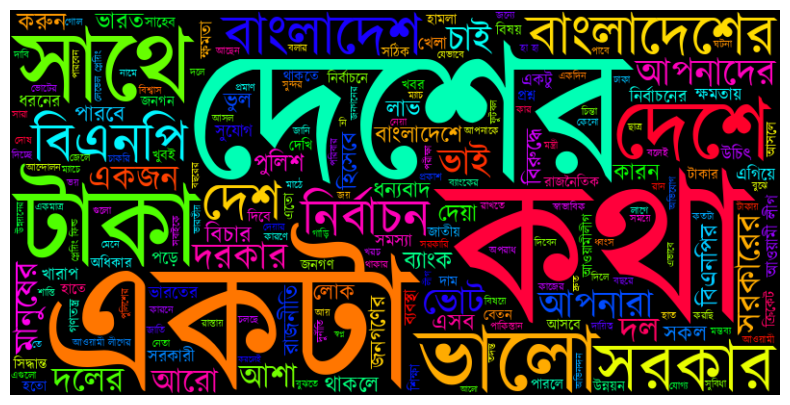

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_test = pd.read_excel('test_v3.xlsx')
all_text = ''
for i, row in df_test.iterrows():
  text = str(row['Data'])
  tokens = text.split()
  tokens = [t for t in tokens if t not in punct]
  text2 = ' '.join(tokens)
  all_text = all_text + ' ' + text2

regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=800, height=400,mode="RGBA",background_color='black',colormap="hsv", stopwords = stopwords,
              font_path="kalpurush.ttf",regexp=regex).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

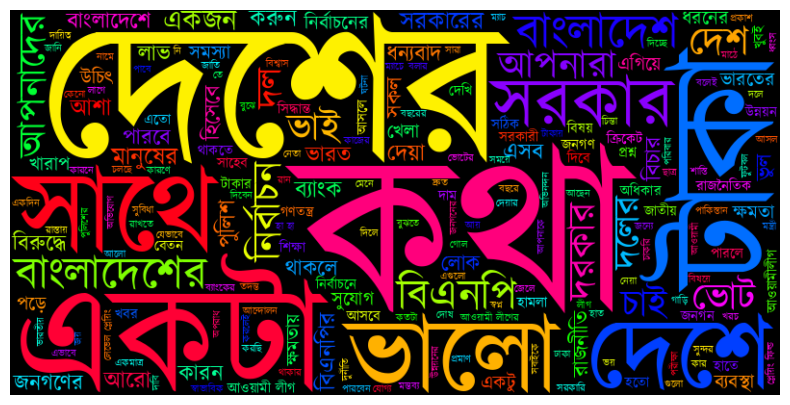

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_train = pd.read_excel('train_v3.xlsx')
all_text = ''
for i, row in df_test.iterrows():
  text = str(row['Data'])
  tokens = text.split()
  tokens = [t for t in tokens if t not in punct]
  text2 = ' '.join(tokens)
  all_text = all_text + ' ' + text2

regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=800, height=400,mode="RGBA",background_color='black',colormap="hsv", stopwords = stopwords,
              font_path="kalpurush.ttf",regexp=regex).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()